In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import joblib

from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor
from sentence_transformers import SentenceTransformer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
df = pd.read_csv('tweets.csv')
df.head(5)

,token,date,reply_count,like_count,retweet_count,quote_count,text,sentiment_label,sentiment_score
0,bitcoin,2022-01-01 00:00:00.000,20,207,31,3,Most people underestimate the impact #Bitcoin ...,Neutral,0.717482
1,bitcoin,2022-01-01 00:00:00.000,232,3405,286,27,#Bitcoin has started a new yearly candle https...,Neutral,0.810814
2,bitcoin,2022-01-01 00:00:00.000,2,861,12,0,@DESTROYBINARY did people forget that the amog...,Neutral,0.606978
3,bitcoin,2022-01-01 00:00:00.000,18,306,30,9,"In 2017, miners attempted to assert control ov...",Negative,0.510956
4,bitcoin,2022-01-01 00:00:00.000,35,721,35,1,Yearly Close \nMonthly Close\nDaily Close\n\nh...,Positive,0.988296


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76797 entries, 0 to 76796
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   token            76797 non-null  object 
 1   date             76797 non-null  object 
 2   reply_count      76797 non-null  int64  
 3   like_count       76797 non-null  int64  
 4   retweet_count    76797 non-null  int64  
 5   quote_count      76797 non-null  int64  
 6   text             76797 non-null  object 
 7   sentiment_label  76797 non-null  object 
 8   sentiment_score  76797 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 5.3+ MB


In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(df[['sentiment_score']])
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
df.head(5)

,token,date,reply_count,like_count,retweet_count,quote_count,text,sentiment_label,sentiment_score,cluster
0,bitcoin,2022-01-01 00:00:00.000,20,207,31,3,Most people underestimate the impact #Bitcoin ...,Neutral,0.717482,1
1,bitcoin,2022-01-01 00:00:00.000,232,3405,286,27,#Bitcoin has started a new yearly candle https...,Neutral,0.810814,2
2,bitcoin,2022-01-01 00:00:00.000,2,861,12,0,@DESTROYBINARY did people forget that the amog...,Neutral,0.606978,0
3,bitcoin,2022-01-01 00:00:00.000,18,306,30,9,"In 2017, miners attempted to assert control ov...",Negative,0.510956,0
4,bitcoin,2022-01-01 00:00:00.000,35,721,35,1,Yearly Close \nMonthly Close\nDaily Close\n\nh...,Positive,0.988296,2


In [41]:
# Count occurrences of each coin/token
print(df['token'].value_counts())

token
bitcoin    76797
Name: count, dtype: int64


In [42]:
print(df['token'].unique())

['bitcoin']


In [43]:
# Show count of missing values per column
print(df.isnull().sum())

token              0
date               0
reply_count        0
like_count         0
retweet_count      0
quote_count        0
text               0
sentiment_label    0
sentiment_score    0
cluster            0
dtype: int64


In [44]:
print(df.duplicated().sum())

63


In [45]:
print(df[df.duplicated()])

         token                     date  reply_count  like_count  \
12893  bitcoin  2022-07-08 00:00:00.000          593        2805   
12900  bitcoin  2022-07-08 00:00:00.000           62         646   
12902  bitcoin  2022-07-08 00:00:00.000          266        3743   
12909  bitcoin  2022-07-08 00:00:00.000          275        3759   
12914  bitcoin  2022-07-08 00:00:00.000          408        6159   
...        ...                      ...          ...         ...   
13996  bitcoin  2022-07-18 00:00:00.000          318        4465   
13998  bitcoin  2022-07-18 00:00:00.000          378        4768   
14004  bitcoin  2022-07-18 00:00:00.000          284        3459   
14013  bitcoin  2022-07-19 00:00:00.000           18        4292   
14022  bitcoin  2022-07-19 00:00:00.000          158        2484   

       retweet_count  quote_count  \
12893            312           23   
12900            190           26   
12902            320           27   
12909            453           19  

In [46]:
print(df[df.duplicated(subset=['text'])])

         token                     date  reply_count  like_count  \
1410   bitcoin  2022-01-21 00:00:00.000         1704        8109   
1899   bitcoin  2022-01-27 00:00:00.000           26        2213   
2084   bitcoin  2022-01-29 00:00:00.000           59        3436   
2956   bitcoin  2022-02-10 00:00:00.000          175        1996   
3569   bitcoin  2022-02-19 00:00:00.000          400        2841   
...        ...                      ...          ...         ...   
75449  bitcoin  2023-06-11 00:00:00.000          274         939   
75705  bitcoin  2023-06-13 00:00:00.000          254        2885   
76520  bitcoin  2023-06-20 00:00:00.000          130        2008   
76528  bitcoin  2023-06-20 00:00:00.000          455        4496   
76611  bitcoin  2023-06-21 00:00:00.000          425        6836   

       retweet_count  quote_count  \
1410             401           42   
1899             311           14   
2084             832           44   
2956             242            6  

In [47]:
df[df.duplicated(subset=['text'], keep=False)]

,token,date,reply_count,like_count,retweet_count,quote_count,text,sentiment_label,sentiment_score,cluster
10,bitcoin,2022-01-01 00:00:00.000,7,197,24,4,"When designing Bitcoin, even aliens need to be...",Neutral,0.823337,2
340,bitcoin,2022-01-05 00:00:00.000,28,2593,383,22,"""Asymmetric opportunities:\n\nInvest in startu...",Positive,0.615503,0
454,bitcoin,2022-01-06 00:00:00.000,340,4135,348,30,Only invest in what you’re willing to HODL 5-1...,Neutral,0.613898,0
470,bitcoin,2022-01-06 00:00:00.000,998,5417,251,26,What's your #Bitcoin sentiment right now?\n\nB...,Neutral,0.876330,2
526,bitcoin,2022-01-07 00:00:00.000,252,3168,241,29,The Bitcoin price bottoms are defined by the s...,Neutral,0.833559,2
...,...,...,...,...,...,...,...,...,...,...
75449,bitcoin,2023-06-11 00:00:00.000,274,939,47,4,"Can #Bitcoin hit $40,000 in 2023?\n\nNO ...",Neutral,0.565868,0
75705,bitcoin,2023-06-13 00:00:00.000,254,2885,580,35,JUST IN: #Bitcoin hash rate hits NEW ALL-TIME ...,Positive,0.750133,1
76520,bitcoin,2023-06-20 00:00:00.000,130,2008,363,10,"Institutions want your #Bitcoin, don't sell it...",Neutral,0.624065,0
76528,bitcoin,2023-06-20 00:00:00.000,455,4496,786,48,"JUST IN: $28,000 #Bitcoin",Neutral,0.834512,2


In [48]:
df.duplicated(subset=['text']).sum()

np.int64(842)

In [49]:
df[df.duplicated(subset=['text'], keep=False)][['text']].head(5)

,text
10,"When designing Bitcoin, even aliens need to be..."
340,"""Asymmetric opportunities:\n\nInvest in startu..."
454,Only invest in what you’re willing to HODL 5-1...
470,What's your #Bitcoin sentiment right now?\n\nB...
526,The Bitcoin price bottoms are defined by the s...


In [50]:
# Buat copy dataset agar aman
df_check = df.copy()

# Tentukan ambang perbedaan (misalnya 5%)
threshold = 0.05

# Sort data agar duplikat berdampingan
df_check = df_check.sort_values(by="text")

# Buat kolom boolean apakah baris saat ini punya teks sama dengan baris sebelumnya
same_text = df_check["text"].eq(df_check["text"].shift())

# Hitung rasio perbedaan tiap metrik dengan baris sebelumnya
like_diff = (df_check["like_count"] - df_check["like_count"].shift()).abs() / (df_check["like_count"] + 1)
retweet_diff = (df_check["retweet_count"] - df_check["retweet_count"].shift()).abs() / (df_check["retweet_count"] + 1)
reply_diff = (df_check["reply_count"] - df_check["reply_count"].shift()).abs() / (df_check["reply_count"] + 1)
quote_diff = (df_check["quote_count"] - df_check["quote_count"].shift()).abs() / (df_check["quote_count"] + 1)

# Jika teks sama dan semua perbedaan metrik < threshold, anggap duplikat
is_smart_duplicate = (
    same_text &
    (like_diff < threshold) &
    (retweet_diff < threshold) &
    (reply_diff < threshold) &
    (quote_diff < threshold)
)

# Lihat hasil
df_smart_duplicates = df_check[is_smart_duplicate]
print("Jumlah duplikat cerdas terdeteksi:", len(df_smart_duplicates))

# Tampilkan 5 contoh
df_smart_duplicates.head(5)

Jumlah duplikat cerdas terdeteksi: 65


,token,date,reply_count,like_count,retweet_count,quote_count,text,sentiment_label,sentiment_score,cluster
12957,bitcoin,2022-07-09 00:00:00.000,23,821,299,11,"""Anarcho""-capitalism is NOT anarchism.\n\nFeat...",Negative,0.881414,2
12925,bitcoin,2022-07-08 00:00:00.000,183,1239,241,21,#BITCOIN IS READY FOR A MASSIVE BULL RUN.\n\nP...,Positive,0.520747,0
13070,bitcoin,2022-07-09 00:00:00.000,614,2693,145,7,#Bitcoin Bottomed out?\n\nNo ...,Neutral,0.721847,1
12954,bitcoin,2022-07-09 00:00:00.000,48,1886,366,17,#Bitcoin Facts https://t.co/txT5Iepw8J,Neutral,0.850891,2
13052,bitcoin,2022-07-09 00:00:00.000,467,2191,409,32,#Bitcoin Wave 5 incoming... 🔥👇 https://t.co/wM...,Positive,0.532511,0


In [51]:
df_clean = df.copy()

# Ambang perbedaan (5%)
threshold = 0.05

# Urutkan berdasarkan teks supaya duplikat berdampingan
df_clean = df_clean.sort_values(by="text")

# Cek teks sama dengan baris sebelumnya
same_text = df_clean["text"].eq(df_clean["text"].shift())

# Hitung perbedaan relatif (rasio) untuk tiap metrik
like_diff = (df_clean["like_count"] - df_clean["like_count"].shift()).abs() / (df_clean["like_count"] + 1)
retweet_diff = (df_clean["retweet_count"] - df_clean["retweet_count"].shift()).abs() / (df_clean["retweet_count"] + 1)
reply_diff = (df_clean["reply_count"] - df_clean["reply_count"].shift()).abs() / (df_clean["reply_count"] + 1)
quote_diff = (df_clean["quote_count"] - df_clean["quote_count"].shift()).abs() / (df_clean["quote_count"] + 1)

# Deteksi duplikat cerdas (semua selisih kecil & teks sama)
smart_duplicate_mask = (
    same_text &
    (like_diff < threshold) &
    (retweet_diff < threshold) &
    (reply_diff < threshold) &
    (quote_diff < threshold)
)

# Hapus duplikat pintar — simpan hanya baris pertama dari setiap grup teks yang sama
df_smart_cleaned = df_clean[~smart_duplicate_mask].reset_index(drop=True)

# Tampilkan hasil
print("Jumlah data sebelum dibersihkan:", len(df_clean))
print("Jumlah duplikat cerdas terhapus:", smart_duplicate_mask.sum())
print("Jumlah data setelah dibersihkan:", len(df_smart_cleaned))

# Simpan versi bersih ke CSV baru (opsional)
df_smart_cleaned.to_csv("tweets_smart_cleaned.csv", index=False)

Jumlah data sebelum dibersihkan: 76797
Jumlah duplikat cerdas terhapus: 65
Jumlah data setelah dibersihkan: 76732


In [52]:
model = SentenceTransformer('all-MiniLM-L6-v2')
X = model.encode(df['text'])

In [53]:
iso = IsolationForest(contamination=0.05, random_state=42)

# Fit ke data embedding
pred = iso.fit_predict(X)

# -1 artinya outlier, 1 artinya normal
df['is_outlier'] = pred

In [54]:
outliers = df[df['is_outlier'] == -1]
print("Jumlah outlier:", len(outliers))
outliers[['text']].head(10)

Jumlah outlier: 3840


,text
49,I've selected @SparrowWallet as the Secret Sat...
83,Just stumbled on this video again. It's comple...
124,El Salvador $BTC bond confirmed for Q1 this ye...
159,"Things Digi does not do:\n\n-Provide context, ..."
203,The bitcoin network launched exactly 13 years ...
259,@MELANIATRUMP Please ask your husband why he r...
264,"Since leaving the WH, the Princeton undergrad ..."
305,"Ricky Wysocki, a 2x World Champion disc golfer..."
331,"1. If someone finds your seed, and you don't h..."
348,SEC Commissioner: I don't understand why a spo...


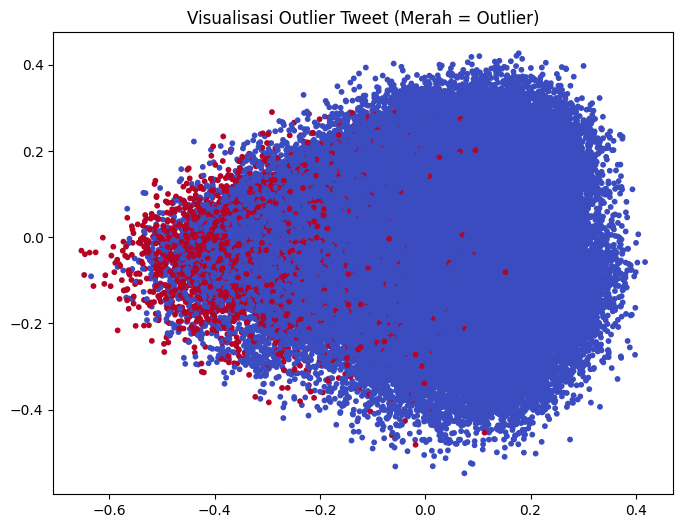

In [55]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], 
            c=(df['is_outlier'] == -1), 
            cmap='coolwarm', s=10)
plt.title("Visualisasi Outlier Tweet (Merah = Outlier)")
plt.show()

In [56]:
df[df['is_outlier'] == -1]['text'].head(20)

49     I've selected @SparrowWallet as the Secret Sat...
83     Just stumbled on this video again. It's comple...
124    El Salvador $BTC bond confirmed for Q1 this ye...
159    Things Digi does not do:\n\n-Provide context, ...
203    The bitcoin network launched exactly 13 years ...
259    @MELANIATRUMP Please ask your husband why he r...
264    Since leaving the WH, the Princeton undergrad ...
305    Ricky Wysocki, a 2x World Champion disc golfer...
331    1. If someone finds your seed, and you don't h...
348    SEC Commissioner: I don't understand why a spo...
418    Timing is key.\n\nMostly looking to play intra...
467    My dad, who thinks Bitcoin is an outright scam...
472    Strike allows you to get any percentage of you...
509    CEO of Barclays Wealth Management has left the...
591    How to become a #bitcoin millionaire guide.\n\...
718    ETH below 3k and Bitcoin below 40... I need mo...
730    Amazon stock as a public company:\nDown 6% in ...
809    My expectation is that b

In [57]:
df_clean = df[df['is_outlier'] != -1].reset_index(drop=True)

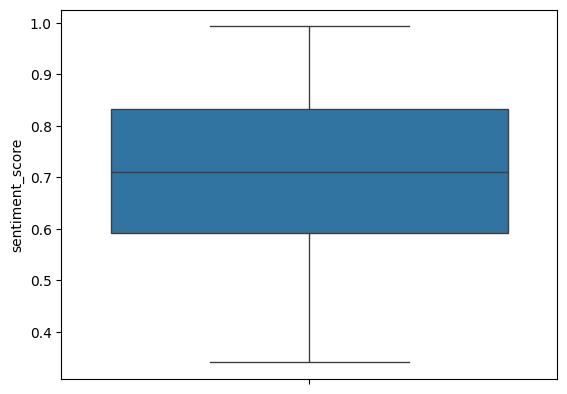

In [58]:
sns.boxplot(data=df['sentiment_score'])
plt.show()

In [59]:
df = df.sort_values('date')

In [60]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [61]:
print(df['date'].dtypes)

datetime64[ns]


In [62]:
trend = df.groupby(df['date'].dt.date)['sentiment_score'].mean().reset_index()


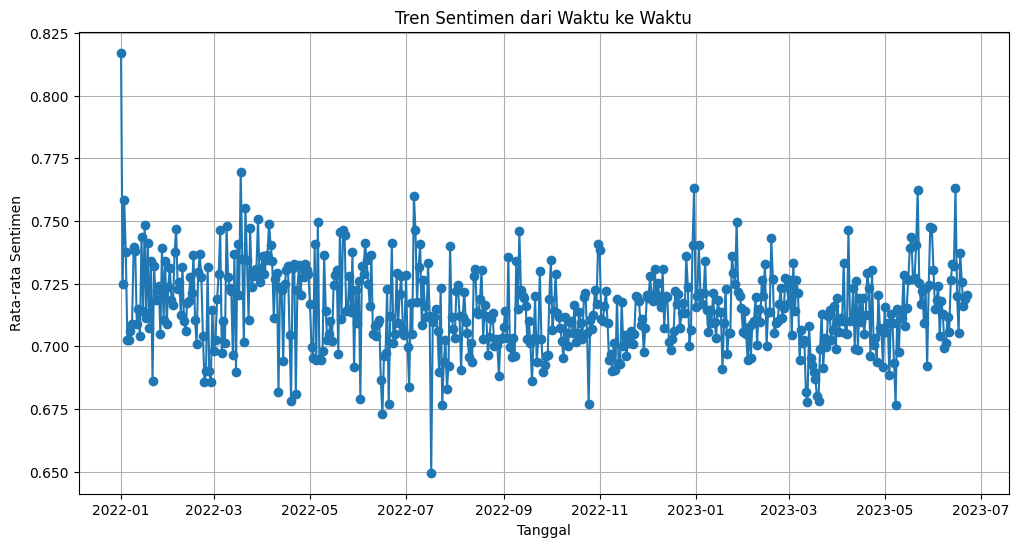

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(trend['date'], trend['sentiment_score'], marker='o')
plt.title('Tren Sentimen dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Sentimen')
plt.grid(True)
plt.show()


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76797 entries, 0 to 76796
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   token            76797 non-null  object        
 1   date             76797 non-null  datetime64[ns]
 2   reply_count      76797 non-null  int64         
 3   like_count       76797 non-null  int64         
 4   retweet_count    76797 non-null  int64         
 5   quote_count      76797 non-null  int64         
 6   text             76797 non-null  object        
 7   sentiment_label  76797 non-null  object        
 8   sentiment_score  76797 non-null  float64       
 9   cluster          76797 non-null  int32         
 10  is_outlier       76797 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(3)
memory usage: 6.7+ MB


In [65]:
df.head(5)

,token,date,reply_count,like_count,retweet_count,quote_count,text,sentiment_label,sentiment_score,cluster,is_outlier
0,bitcoin,2022-01-01,20,207,31,3,Most people underestimate the impact #Bitcoin ...,Neutral,0.717482,1,1
84,bitcoin,2022-01-01,42,8102,271,11,Next #altcoin 2022? Top 8 Influential altcoin...,Neutral,0.761826,1,1
83,bitcoin,2022-01-01,80,730,109,4,Just stumbled on this video again. It's comple...,Negative,0.927951,2,-1
82,bitcoin,2022-01-01,38,718,64,9,Maybe 2022 will be the year the dollar finally...,Neutral,0.642443,1,1
81,bitcoin,2022-01-01,1951,2212,560,31,"Cryptocurrency 2021 Recap\n\n#SHIB: +52,601,74...",Neutral,0.743576,1,1


In [66]:
# ambil kolom penting
X = df['text']
y = df['sentiment_label']

# ubah label ke angka (0=Neg, 1=Neu, 2=Pos)
le = LabelEncoder()
y = le.fit_transform(y)

# bagi data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [67]:
model = SentenceTransformer('all-MiniLM-L6-v2')

X_train = X_train.astype(str)
X_test = X_test.astype(str)

x_train_emb = model.encode(X_train.tolist(), show_progress_bar=True)
x_test_emb = model.encode(X_test.tolist(), show_progress_bar=True)

clf = LogisticRegression(max_iter=300)
clf.fit(x_train_emb, y_train)

# 4. Prediksi & evaluasi
y_pred = clf.predict(x_test_emb)
print(classification_report(y_test, y_pred, target_names=le.classes_))

Batches: 100%|██████████| 480/480 [01:45<00:00,  4.56it/s]


              precision    recall  f1-score   support

    Negative       0.65      0.51      0.57      2389
     Neutral       0.71      0.82      0.76      8421
    Positive       0.71      0.60      0.65      4550

    accuracy                           0.71     15360
   macro avg       0.69      0.64      0.66     15360
weighted avg       0.70      0.71      0.70     15360



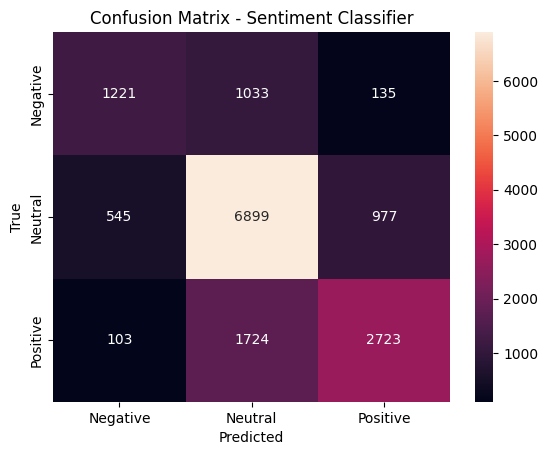

In [68]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Sentiment Classifier")
plt.show()

In [69]:
joblib.dump(clf, 'sentiment_model.pkl')
joblib.dump(model, 'embedding_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [74]:
text_new = ["fuck bitcoin"]
text_emb = model.encode(text_new)
pred = clf.predict(text_emb)
print(le.inverse_transform(pred))


['Neutral']


In [71]:
df = pd.read_csv("tweets.csv")
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Pastikan hanya baris valid
df = df.dropna(subset=["date", "sentiment_score"])

# 2. Buat tren harian
trend = df.groupby(df["date"].dt.date)["sentiment_score"].mean().reset_index()
trend["date"] = pd.to_datetime(trend["date"])

# 3. Ubah tanggal jadi angka (ordinal)
trend["t"] = trend["date"].map(datetime.toordinal)

X = trend[["t"]]
y = trend["sentiment_score"]

# 4. Train model regresi sederhana (bisa diganti model lain nanti)
rf_trend = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf_trend.fit(X, y)

# 5. Simpan model dan info terakhir
joblib.dump(rf_trend, "trend_model.pkl")

# Simpan tanggal terakhir untuk referensi (bisa juga disimpan di file json)
last_date = trend["date"].max()
joblib.dump(last_date, "trend_last_date.pkl")

['trend_last_date.pkl']

In [72]:
rf_trend = joblib.load("trend_model.pkl")
last_date = joblib.load("trend_last_date.pkl")

def forecast_trend(n_days_ahead=90):
    # Buat range tanggal ke depan
    future_dates = pd.date_range(last_date + timedelta(days=1),
                                 periods=n_days_ahead, freq="D")

    # Ubah ke ordinal
    t_future = future_dates.map(datetime.toordinal).to_frame(name="t")

    # Prediksi
    y_future = rf_trend.predict(t_future)

    forecast_df = pd.DataFrame({
        "date": future_dates,
        "predicted_sentiment_score": y_future
    })
    return forecast_df